<a href="https://colab.research.google.com/github/vaibhavmande131198/Supervised-learning/blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**



This project focuses on predicting the hourly demand for rental bikes in urban areas to ensure a stable and efficient supply, thereby reducing user wait times and enhancing the bike-sharing experience. By conducting exploratory data analysis (EDA) to understand patterns and relationships in the data, and employing various regression algorithms such as linear regression, ridge regression, lasso regression, and elastic net regression, we aim to accurately forecast bike demand.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the evolving landscape of urban mobility, companies like Yulu Bike are at the forefront of providing efficient and eco-friendly transportation solutions. Accurate prediction of bike-sharing demand is crucial for optimizing fleet management, enhancing customer satisfaction, and maximizing operational efficiency. By analyzing data related to bike-sharing demand, Yulu Bike aims to gain a deeper understanding of the factors influencing bike rentals. The dataset includes a range of variables such as weather conditions, time of day, and special events, which impact bike usage patterns

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [100]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# save the File_path
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter data science/Machine learning /ML Projects/Supervised Learning : Regression Project/SeoulBikeData.csv'

In [103]:
# Load Dataset
df = pd.read_csv(file_path,encoding="ISO-8859-1")

### Dataset First View

In [104]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [105]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [106]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [107]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [108]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [109]:
# Visualizing the missing values
df.isnull()

Date  Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  \
0     False              False  False            False        False   
1     False              False  False            False        False   
2     False              False  False            False        False   
3     False              False  False            False        False   
4     False              False  False            False        False   
...     ...                ...    ...              ...          ...   
8755  False              False  False            False        False   
8756  False              False  False            False        False   
8757  False              False  False            False        False   
8758  False              False  False            False        False   
8759  False              False  False            False        False   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                False             False                      False   
1                False             False                      False   
2                False             False                      False   
3                False             False                      False   
4                False             False                      False   
...                ...               ...                        ...   
8755             False             False                      False   
8756             False             False                      False   
8757             False             False                      False   
8758             False             False                      False   
8759             False             False                      False   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                       False         False          False    False    False   
1                       False         False          False    False    False   
2                       False         False          False    False    False   
3                       False         False          False    False    False   
4                       False         False          False    False    False   
...                       ...           ...            ...      ...      ...   
8755                    False         False          False    False    False   
8756                    False         False          False    False    False   
8757                    False         False          False    False    False   
8758                    False         False          False    False    False   
8759                    False         False          False    False    False   

      Functioning Day  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
8755            False  
8756            False  
8757            False  
8758            False  
8759            False  

[8760 rows x 14 columns]

### What did you know about your dataset?

1. The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018.

2. There are 8760 observations and 14 features in the given dataset.

 out of which there thre are 10 numerical ['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed', 'Visibility ', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall' ]

 and 4 categorial feature ['Date', 'Seasons', 'Holiday', 'Functioning_Day']

 However, date has data type of object which should be further treated to have correct data type and as per data description hour represents timestamp.


3. There is no duplicate and missing in the dataset.



## ***2. Understanding Your Variables***

In [110]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [111]:
#stores the name of columns in the list
column_list = df.columns.to_list()
print(column_list)

['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [112]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

**Date**: Date on which bike rented.

**Rented Bike Count** : Count of Bike Rented.

**Hour** : Hour of the day (0-23).

**Temperature** : Temprature of the day in celcius.

**Humidity** : Humidity of the day in percentage.

**Wind Speed** : Speed of wind in m/s.

**Visibility** : Visibility Measure 10m.

**Dew Point Temprature** : Dew Point Temprature measure in degree celcius.

**Solar radiation** : Solar radiation measure in MJ/m2.

**Rainfall** : Rainfall in mm.

**Snowfall** : Snowfall measure in cm.

**Seasons** : Spring, Summer, Fall, Winter.

**Holidays** : Holiday / No Holiday

**Functional** : Functional Day / No functional Day

### Check Unique Values for each variable.

In [113]:
# Check Unique Values for each variable.
# Example : df['Seasons'].value_counts().count()   ----> it will give us the total number of unique values in the season column
''' mothood 1:
df.nunique()'''

#Method 2:
for i in df.columns:
  print(f'{i} : {df[i].value_counts().count()}')


Date : 365
Rented Bike Count : 2166
Hour : 24
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51
Seasons : 4
Holiday : 2
Functioning Day : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [114]:
# Write your code to make your dataset analysis ready.
#creating copy to keep oringal data safe
new_df = df.copy()

In [115]:
#basic checks of the copied dataset
print(f'shape : {new_df.shape}')
print(f'Null_count: {new_df.isnull().sum()}')
print(f'duplicate_count: {new_df.duplicated().sum()}')
print(f'columns: {new_df.columns.to_list()}')
print(f'info: {new_df.info()}')

shape : (8760, 14)
Null_count: Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
duplicate_count: 0
columns: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8

In [116]:
new_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

from the above basics checks we can see that date has object datatype which needs to convert into date

In [117]:
# converting the date column into date datatype
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%d/%m/%Y')

In [118]:
#Checking the datatype of date column changed or not
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

We have successfully changed the datatype of date column from object to datetime

In [119]:
new_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [120]:
#Extracting day, month and year from the date column for further analysis
#Extracting month from date column
import calendar
new_df['month'] = pd.DatetimeIndex(new_df['Date']).month
new_df['month'] = new_df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
new_df['day'] = new_df['Date'].dt.day_name()

#Extracting year
new_df['year'] = new_df['Date'].dt.year

In [121]:
#Drop date column which is not needed now
new_df.drop( 'Date', axis = 1, inplace = True)

In [122]:
#convert a year column as categorical
new_df['year'] = new_df['year'].astype('object')

In [123]:
# Define the function to categorize hours
def categorize_time_of_day(hour):
    if 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    elif hour >= 21 or hour < 4:
        return 'night'
    else:
        return 'morning'

# Apply the function to create a new column
new_df['Time_of_Day'] = new_df['Hour'].apply(categorize_time_of_day)

In [124]:
#define weekend and weekday based on the days
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'weekend'

    else:
        return 'weekday'

# Apply the function to create a new column
new_df['Day_Type'] = new_df['day'].apply(categorize_day)

In [125]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

In [126]:
#check the day month and name column
new_df.head(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day month  \
0           0.0            0.0  Winter  No Holiday             Yes   Dec   
1           0.0            0.0  Winter  No Holiday             Yes   Dec   
2           0.0            0.0  Winter  No Holiday             Yes   Dec   
3           0.0            0.0  Winter  No Holiday             Yes   Dec   
4           0.0            0.0  Winter  No Holiday             Yes   Dec   

      day  year Time_of_Day Day_Type  
0  Friday  2017       night  weekday  
1  Friday  2017       night  weekday  
2  Friday  2017       night  weekday  
3  Friday  2017       night  weekday  
4  Friday  2017     morning  weekday

In [127]:
#Store the numerical and categorical features for univariate , bivariate and multivariate analysis
numerical_features = new_df.select_dtypes(exclude='object').columns
categorical_features = new_df.select_dtypes(include='object').columns

In [128]:
print(numerical_features)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')


In [129]:
print(categorical_features)

Index(['Seasons', 'Holiday', 'Functioning Day', 'month', 'day', 'year',
       'Time_of_Day', 'Day_Type'],
      dtype='object')


### What all manipulations have you done and insights you found?



There are no null value or duplicate value in the dataset, so thers is no need to take care of that.

We have done following data wrangling tasks:

1.Convert date column into datetime datatype

2.Extract day , month and year from date column

3.Remove date column

4.Convert year column as categorical column

5.Divide the hours such that we can get the time of day in morning , afternoon, evening, and night

6.Divide the days into weekday or weekend

5.Store all the numerical and categorical column of the dataframe for further analysis such as Univariate, bivariate and multivariate analysis



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##Basic Visualization to gain some insights from the data

### Chart - 1  :  Monthly Bike Demand


In [130]:
# average demand of bikes per month
monthly_bike_demand = new_df.groupby('month')['Rented Bike Count'].mean().sort_values(ascending = False)
print(monthly_bike_demand)

month
Jun    1245.676389
Jul     987.177419
May     950.387097
Sep     935.572222
Aug     876.192204
Oct     874.563172
Apr     728.093056
Nov     646.826389
Mar     511.551075
Dec     249.099462
Feb     225.941964
Jan     201.620968
Name: Rented Bike Count, dtype: float64


<ipython-input-131-5f911355269f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_bike_demand.index, y=monthly_bike_demand.values  , palette='mako')


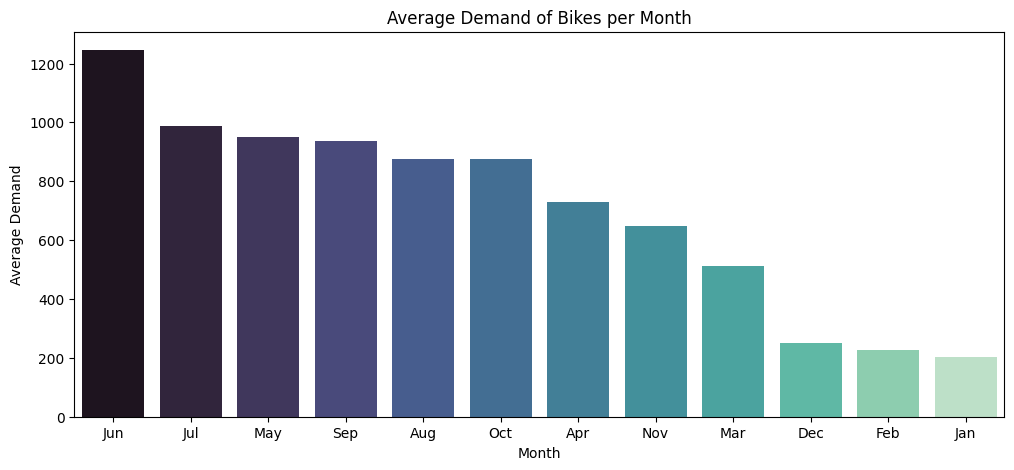

In [131]:
# Visualization code
plt.figure(figsize=(12,5))
sns.barplot(x=monthly_bike_demand.index, y=monthly_bike_demand.values  , palette='mako')
plt.title('Average Demand of Bikes per Month')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are ideal for comparing a large set of categorical values, Here we have plot a graph for each month and gain some insights about the Bike demand for each month.

##### 2. What is/are the insight(s) found from the chart?

In the month of June there is huge demand of bikes and it is very poor at starting month of year

We can observe that there is poor demand of bike in the winter season (December, January, February)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the demand trend over different months, the company can optimize its operations, resources, pricing to meet the demand and maximize revenue. For example, during peak months (May, June, July), the company can increase the number of bikes available and adjust pricing strategies to maximize revenue. Additionally, during the low-demand months (Dec, Jan, Feb), the company can reduce the number of bikes available and offer promotions or discounts to attract customers.

#### Chart - 2 : Seasonal Bikes Demand

In [132]:
# Average demand of bike by seasons
seasonal_bike_demand = new_df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending = False)
print(seasonal_bike_demand)

Seasons
Summer    1034.073370
Autumn     819.597985
Spring     730.031250
Winter     225.541204
Name: Rented Bike Count, dtype: float64


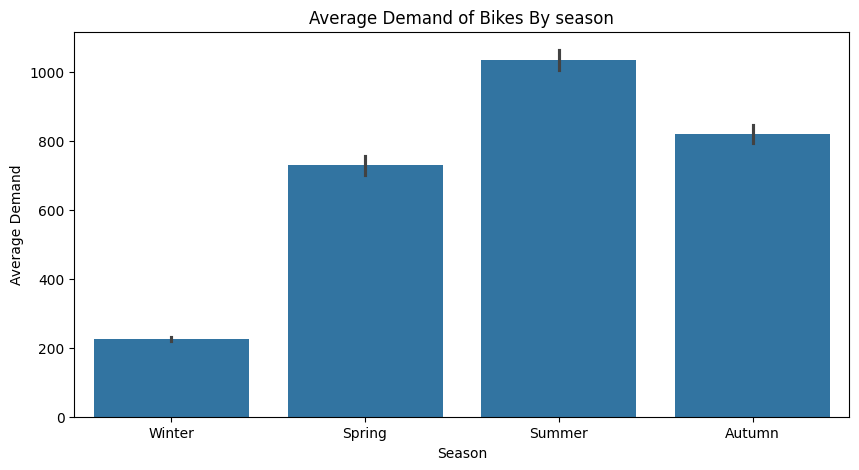

In [133]:
# Plot a graph for each season and gain some insights about the Bike demand for each season

plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data = new_df )
plt.title('Average Demand of Bikes By season')
plt.xlabel('Season')
plt.ylabel('Average Demand')
plt.show()

##### 1. Why did you pick the specific chart?


Bar graphs are ideal for comparing a large set of categorical values, Here we have plot a graph for each season and gain some insights about the Bike demand for each season.

##### 2. What is/are the insight(s) found from the chart?

Rentals Bike demand is highest in summer season and lowest in winter season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This finding can help the bike sharing company plan its operations more effectively by increasing the number of bikes available during the peak season and reducing them during the off-season.

#### Chart - 3 : Rented Bike count by Each phase of day acorss seasons

In [134]:
# Bike demand according to time of day
phase_bike_demand = new_df.groupby('Time_of_Day')['Rented Bike Count'].mean().sort_values(ascending = False)
print(phase_bike_demand)

Time_of_Day
evening      1226.386986
afternoon     790.264110
night         585.425440
morning       494.450342
Name: Rented Bike Count, dtype: float64


In [135]:
# Bike demand across Season and time of day
seasonal_demand_per_phase = new_df.groupby(['Seasons', 'Time_of_Day'])['Rented Bike Count'].mean()
print(seasonal_demand_per_phase)

Seasons  Time_of_Day
Autumn   afternoon       969.516484
         evening        1420.500000
         morning         576.785714
         night           646.640502
Spring   afternoon       927.502174
         evening        1297.543478
         morning         495.983696
         night           532.170807
Summer   afternoon       968.945652
         evening        1838.152174
         morning         712.290761
         night           988.871118
Winter   afternoon       286.080000
         evening         332.019444
         morning         186.951389
         night           165.557143
Name: Rented Bike Count, dtype: float64


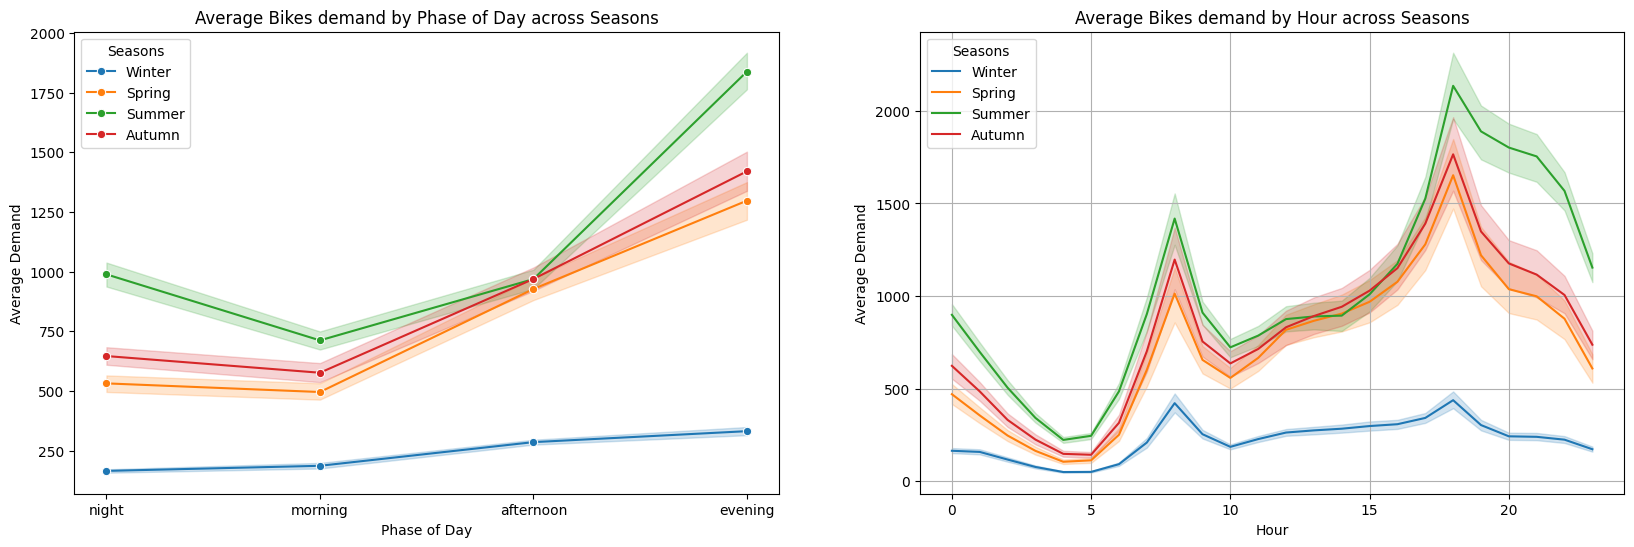

In [136]:
# visualization code
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.lineplot(x='Time_of_Day', y='Rented Bike Count', data=new_df, color = 'red',marker='o', hue="Seasons")
plt.title('Average Bikes demand by Phase of Day across Seasons')
plt.xlabel('Phase of Day')
plt.ylabel('Average Demand')
plt.subplot(1,2,2)
sns.lineplot(x ='Hour' , y='Rented Bike Count' ,  data=new_df, color = 'red', hue="Seasons")
plt.title('Average Bikes demand by Hour across Seasons')
plt.xlabel('Hour')
plt.ylabel('Average Demand')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Line charts are particularly effective for visualizing data that changes over time or across a continuous variable. Here we have created a categorical feature based on hours of the day so we can either plot bar graph or line chart.
basically, Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time


##### 2. What is/are the insight(s) found from the chart?

The demand is higher in the morning,afternoon and evening time as people go to offices/schools and come back in evening/afternoon. Demand is very low in the night time.

we can also see that the demand is very low in winter season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, company can manage the resources better in the morning to evening based on the above graph.

#### Chart - 4 :  Demand of bike over weekend and weekdays

In [137]:
weekend_weekday_demand = new_df.groupby('Day_Type')['Rented Bike Count'].mean().sort_values(ascending = False)
print(weekend_weekday_demand)

Day_Type
weekday    719.448914
weekend    667.342147
Name: Rented Bike Count, dtype: float64


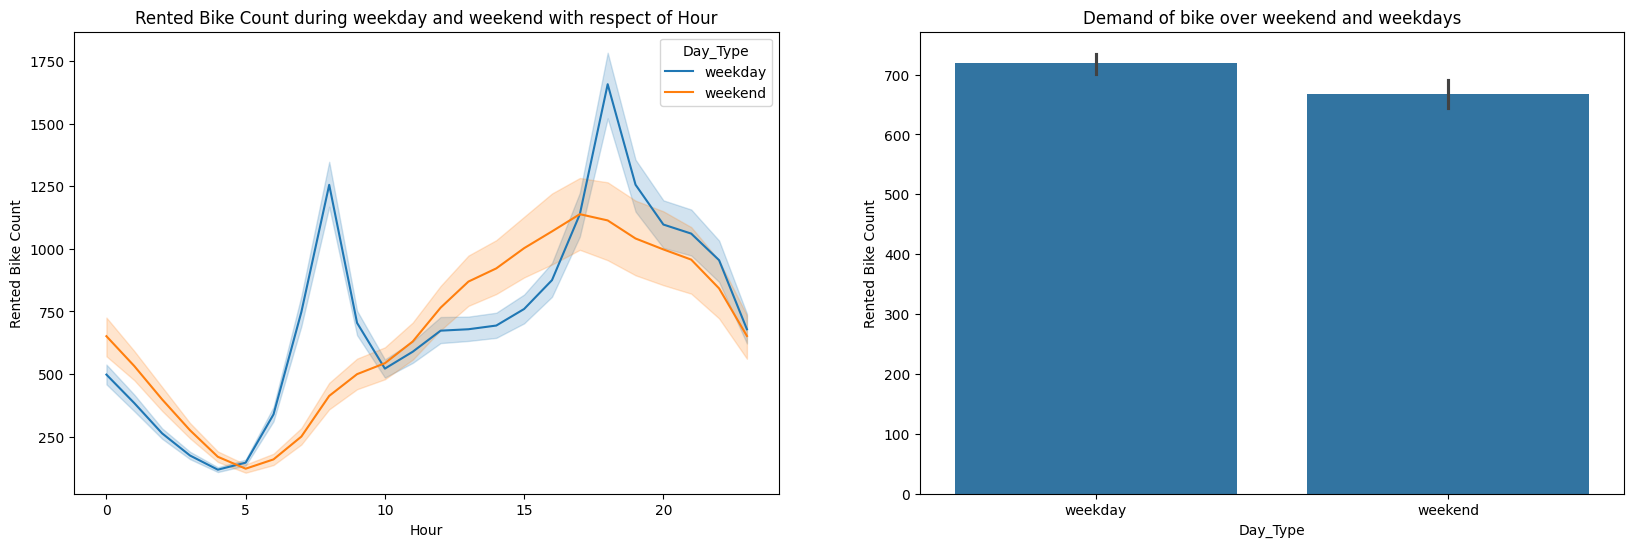

In [138]:
# visualization code
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(x=new_df["Hour"],y=new_df['Rented Bike Count'],hue=new_df['Day_Type'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")
plt.subplot(1,2,2)
sns.barplot(x = 'Day_Type' , y = 'Rented Bike Count' , data = new_df)
plt.title('Demand of bike over weekend and weekdays')
plt.xlabel('Day_Type')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I want to compare the demand of bike based on hour and across the weekend and weekdays so i have plot a line chart which is best suited to show the trend of demand over time.

Bar graph is best suited to compare the numerical values across categorical feature. this is the reason I have plot a bar graph

##### 2. What is/are the insight(s) found from the chart?


We can see that there is almost same demand of bike over the weekend and weekdays.

we can also see that there is spike in the demand in case of weekdays for certiain time period .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe that the demand of bike is almost same for weekend and weekday, so company needs to follow the same stratergy for weekend and weekday, they need to allocate a shift between the employees to work in the weekend and also need to maintain the same supply of bikes over the weekend also.

#### Chart - 5 : Effect of temperature , dew point temperature on the demand of bike

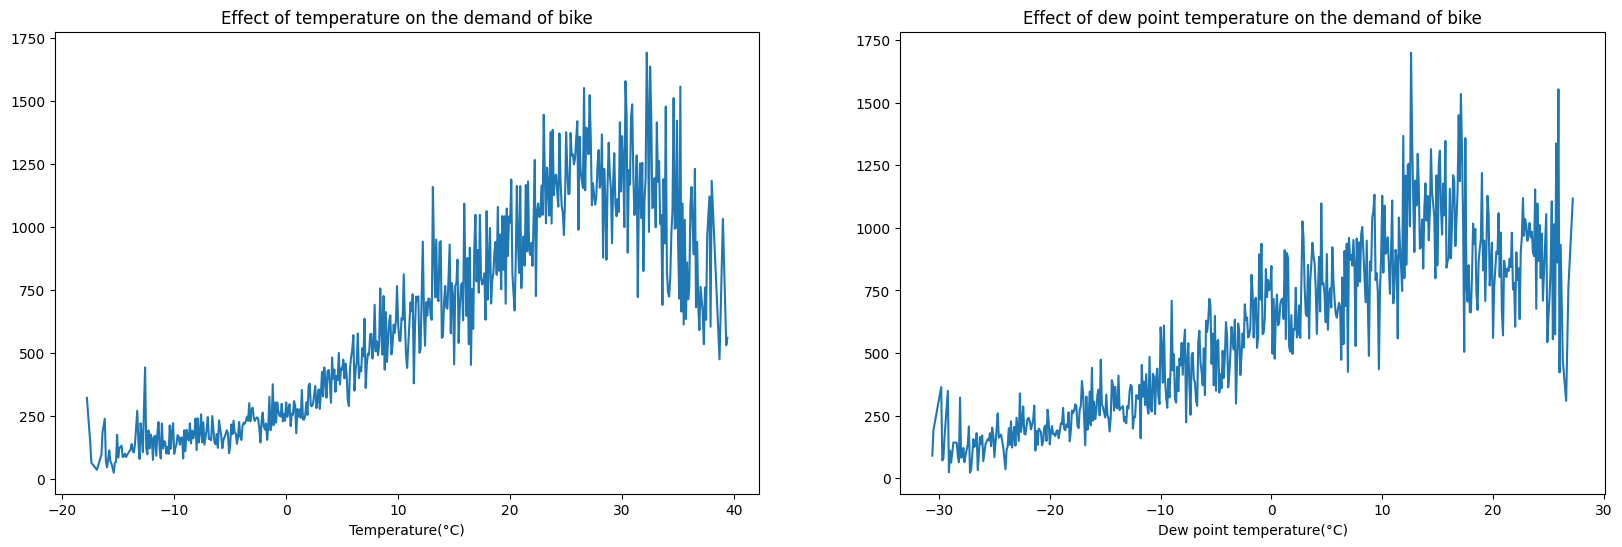

In [139]:
# Chart - 5 visualization code
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot(kind='line')
plt.title('Effect of temperature on the demand of bike')
plt.subplot(1,2,2)
df.groupby('Dew point temperature(°C)')['Rented Bike Count'].mean().plot(kind='line')
plt.title('Effect of dew point temperature on the demand of bike')
plt.show()

##### 1. Why did you pick the specific chart?

To see the effect of temperature, dew point temperature I have used line chart and to see the trend of bike demand according to features.

##### 2. What is/are the insight(s) found from the chart?

The Rentals Bike demand increases as tempreature increases although too high temperature like above 30°C leads to decrease in demand.
the same thing we have already seen in the past when we compare the demand of bike across different season.

We can see in the winter season demand (Temperature ranges from -20 to 10 degree) is less and in the summer season it increases accordingly.




#### Chart - 6 : Effect of Rainfall and Snowfall on Bike demand

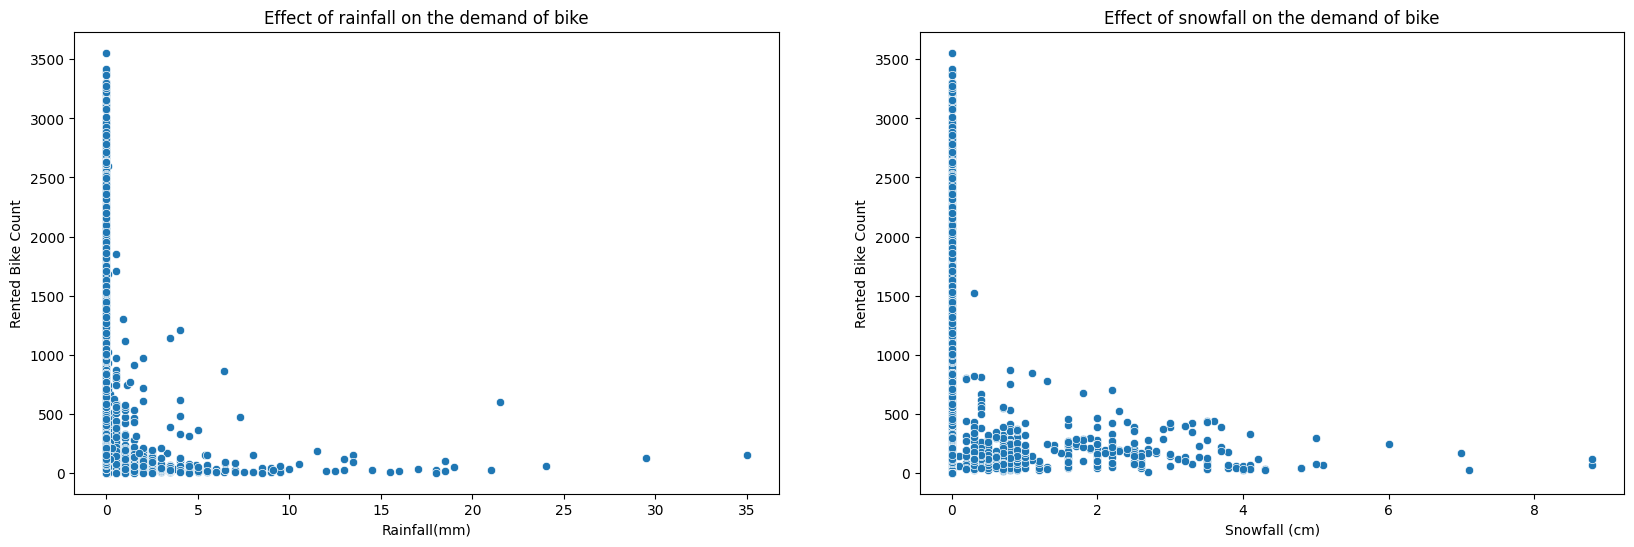

In [140]:
#Visualization code
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'Rainfall(mm)' , y = 'Rented Bike Count' , data = new_df)
plt.title('Effect of rainfall on the demand of bike')
plt.subplot(1,2,2)
sns.scatterplot(x = 'Snowfall (cm)' , y = 'Rented Bike Count' , data = new_df)
plt.title('Effect of snowfall on the demand of bike')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between Rented Bike Count and Rainfall as well as Snowfall.

##### 2. What is/are the insight(s) found from the chart?

There is huge effect of both rainfall and snowfall on bike demand. Most Rentals Bikes are rented mostly when there is 0 rainfall and snowfall. As Rainfall and snowfall increases demand decreases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Although we can't control Rainfall or Snowfall but by understanding the demand trend over snowfall and rainfall, the company can adjust its operations to better meet customer needs attractiveness maybe by offer promotions or discounts.

#Univariate Analysis :

In [141]:
#Descriptive statstics
new_df.describe().T   # .T is used to transpose the dataframe

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

We can see the count of row,mean,median,standard deviation, minimum value, maximum value of each numerical column.


Insights :
When describing a numerical column in a dataset, various insights can be derived from the output, particularly regarding the distribution, central tendency, and variability of the data. This analysis can also help identify outliers and missing information.

1.Count measures the number of non-null entries in the column. indicated that there is no null values in the column.

2.The average value, providing a measure of central tendency.

3.The middle value when the data is sorted, which is less affected by outliers than the mean.

4.Standard Deviation: Indicates the amount of variation or dispersion in the values.

5.By examining the minimum and maximum values along with standard deviation or mean value we can identify potential outliers

Example:-
1. for the rainfall and snowfall we can observe that the there is huge differance between mean and maximum value indicates that there is a outliers and probably the skewness in the data

6.when mean and median values are nearly equal then we can say that the feature is normally distributed.

Example :-
1. for dew point temperature, humidity we can clearly see that mean is nearly equal to 50 percent, we can say that this features are normally distributed.



#### Chart - 7 : Distribution of target variable

<ipython-input-142-f58f42c8ba51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Rented Bike Count'] )    #distplot is combination of histogram and kde(density) plot. the smooth curve in the plot is called KDE


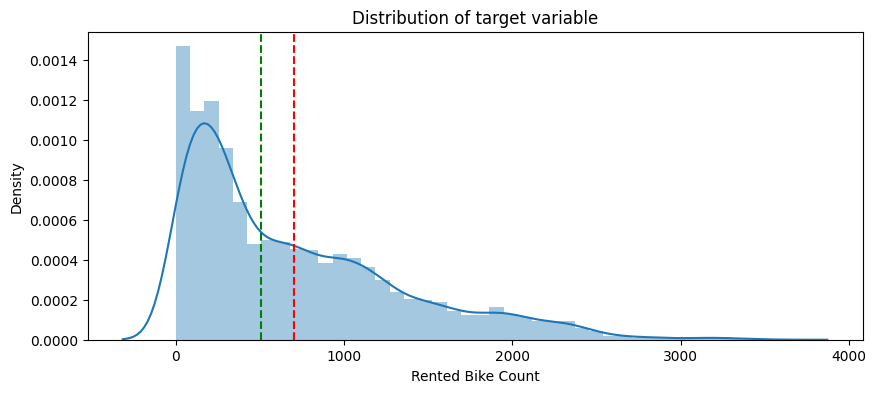

In [142]:
#Distribution of dependent variable
plt.figure(figsize = (10,4))
sns.distplot(new_df['Rented Bike Count'] )    #distplot is combination of histogram and kde(density) plot. the smooth curve in the plot is called KDE
plt.title('Distribution of target variable')
plt.axvline(new_df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(new_df['Rented Bike Count'].median(), color='green', linestyle='dashed', linewidth=1.5)
plt.show()

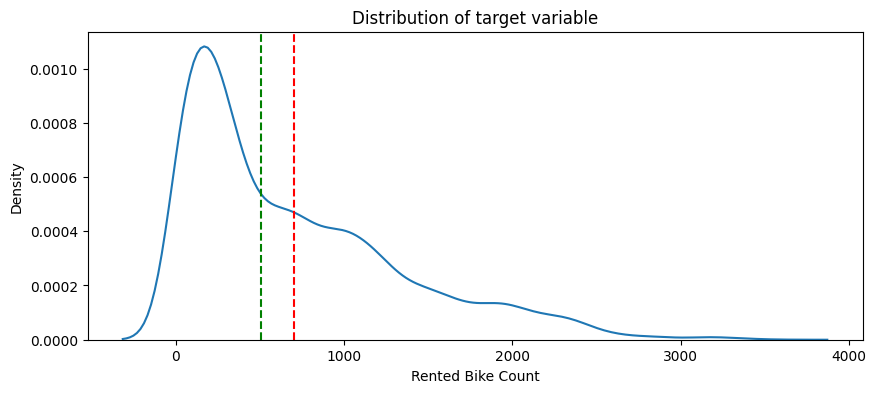

In [143]:
plt.figure(figsize = (10,4))
sns.kdeplot(new_df['Rented Bike Count'])
plt.title('Distribution of target variable')
plt.axvline(new_df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(new_df['Rented Bike Count'].median(), color='green', linestyle='dashed', linewidth=1.5)
plt.show()

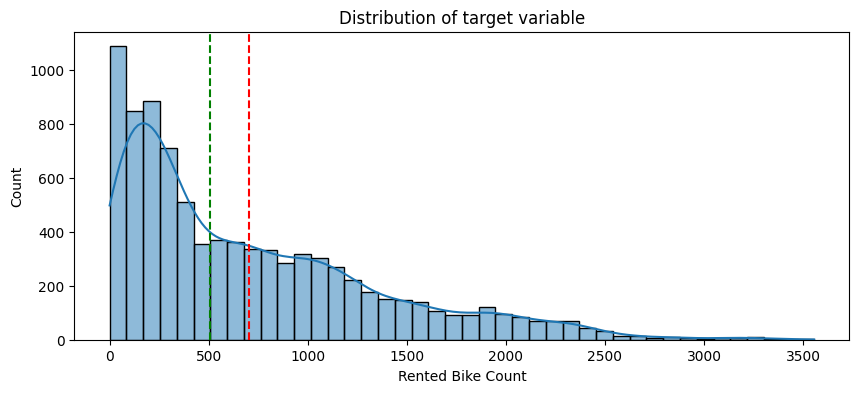

In [144]:
plt.figure(figsize = (10,4))
sns.histplot(new_df['Rented Bike Count'], kde=True)
plt.title('Distribution of target variable')
plt.axvline(new_df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(new_df['Rented Bike Count'].median(), color='green', linestyle='dashed', linewidth=1.5)
plt.show()

##### 1. Why did you pick the specific chart?

the distribution plot or histogram is used to analyze the distribution of dependent variable(rented bike count). Here we have plot distribution plot to analyze the distribution of target variable,

##### 2. What is/are the insight(s) found from the chart?

Distribution of target varibale is positive skewed which indicates that there is a outliers present in the data.

mean > median > mode

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Skewness indicates that there is a outliers in the target variable and need to remove the outliers

2.another we can make the distribution of target variable near to normal by using transformation (square root transformation , cube root transformation, log transformation etc). the transformation will convert the values of target variable in same scale which will improve the model accuracy

#### Chart - 8 : Visualize outliers in the target variable

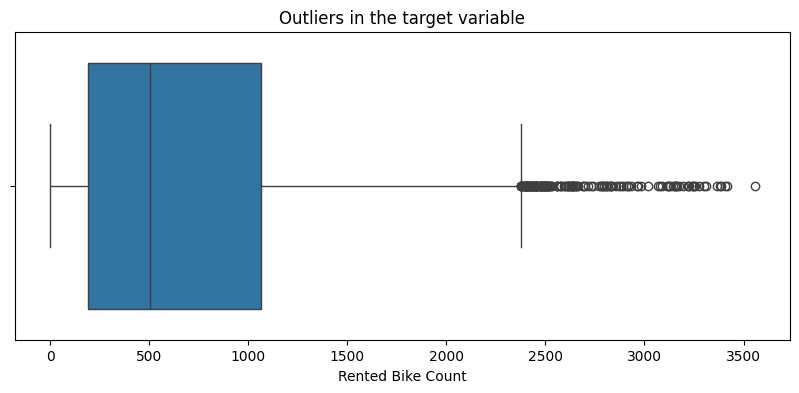

In [145]:
# Outliers in the target variable
plt.figure(figsize = (10,4))
sns.boxplot(x= new_df['Rented Bike Count'])
plt.title('Outliers in the target variable')
plt.show()

##### 1. Why did you pick the specific chart?

Box plot is best suited to detect the outliers in the feature.

##### 2. What is/are the insight(s) found from the chart?

Box plot confirms that there is a outliers in the target variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 We Needs to be remove outliers from the target variable to improve model performance or need to trasform the target variable.

Addressing positive skewness through appropriate transformations and carefully considering outlier management are crucial steps in preparing your target variable for effective modeling.

#### Chart - 9 : Distribution of independent Numerical features

In [146]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [147]:
independent_numerical_features = numerical_features.drop('Rented Bike Count')
print(independent_numerical_features)

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')


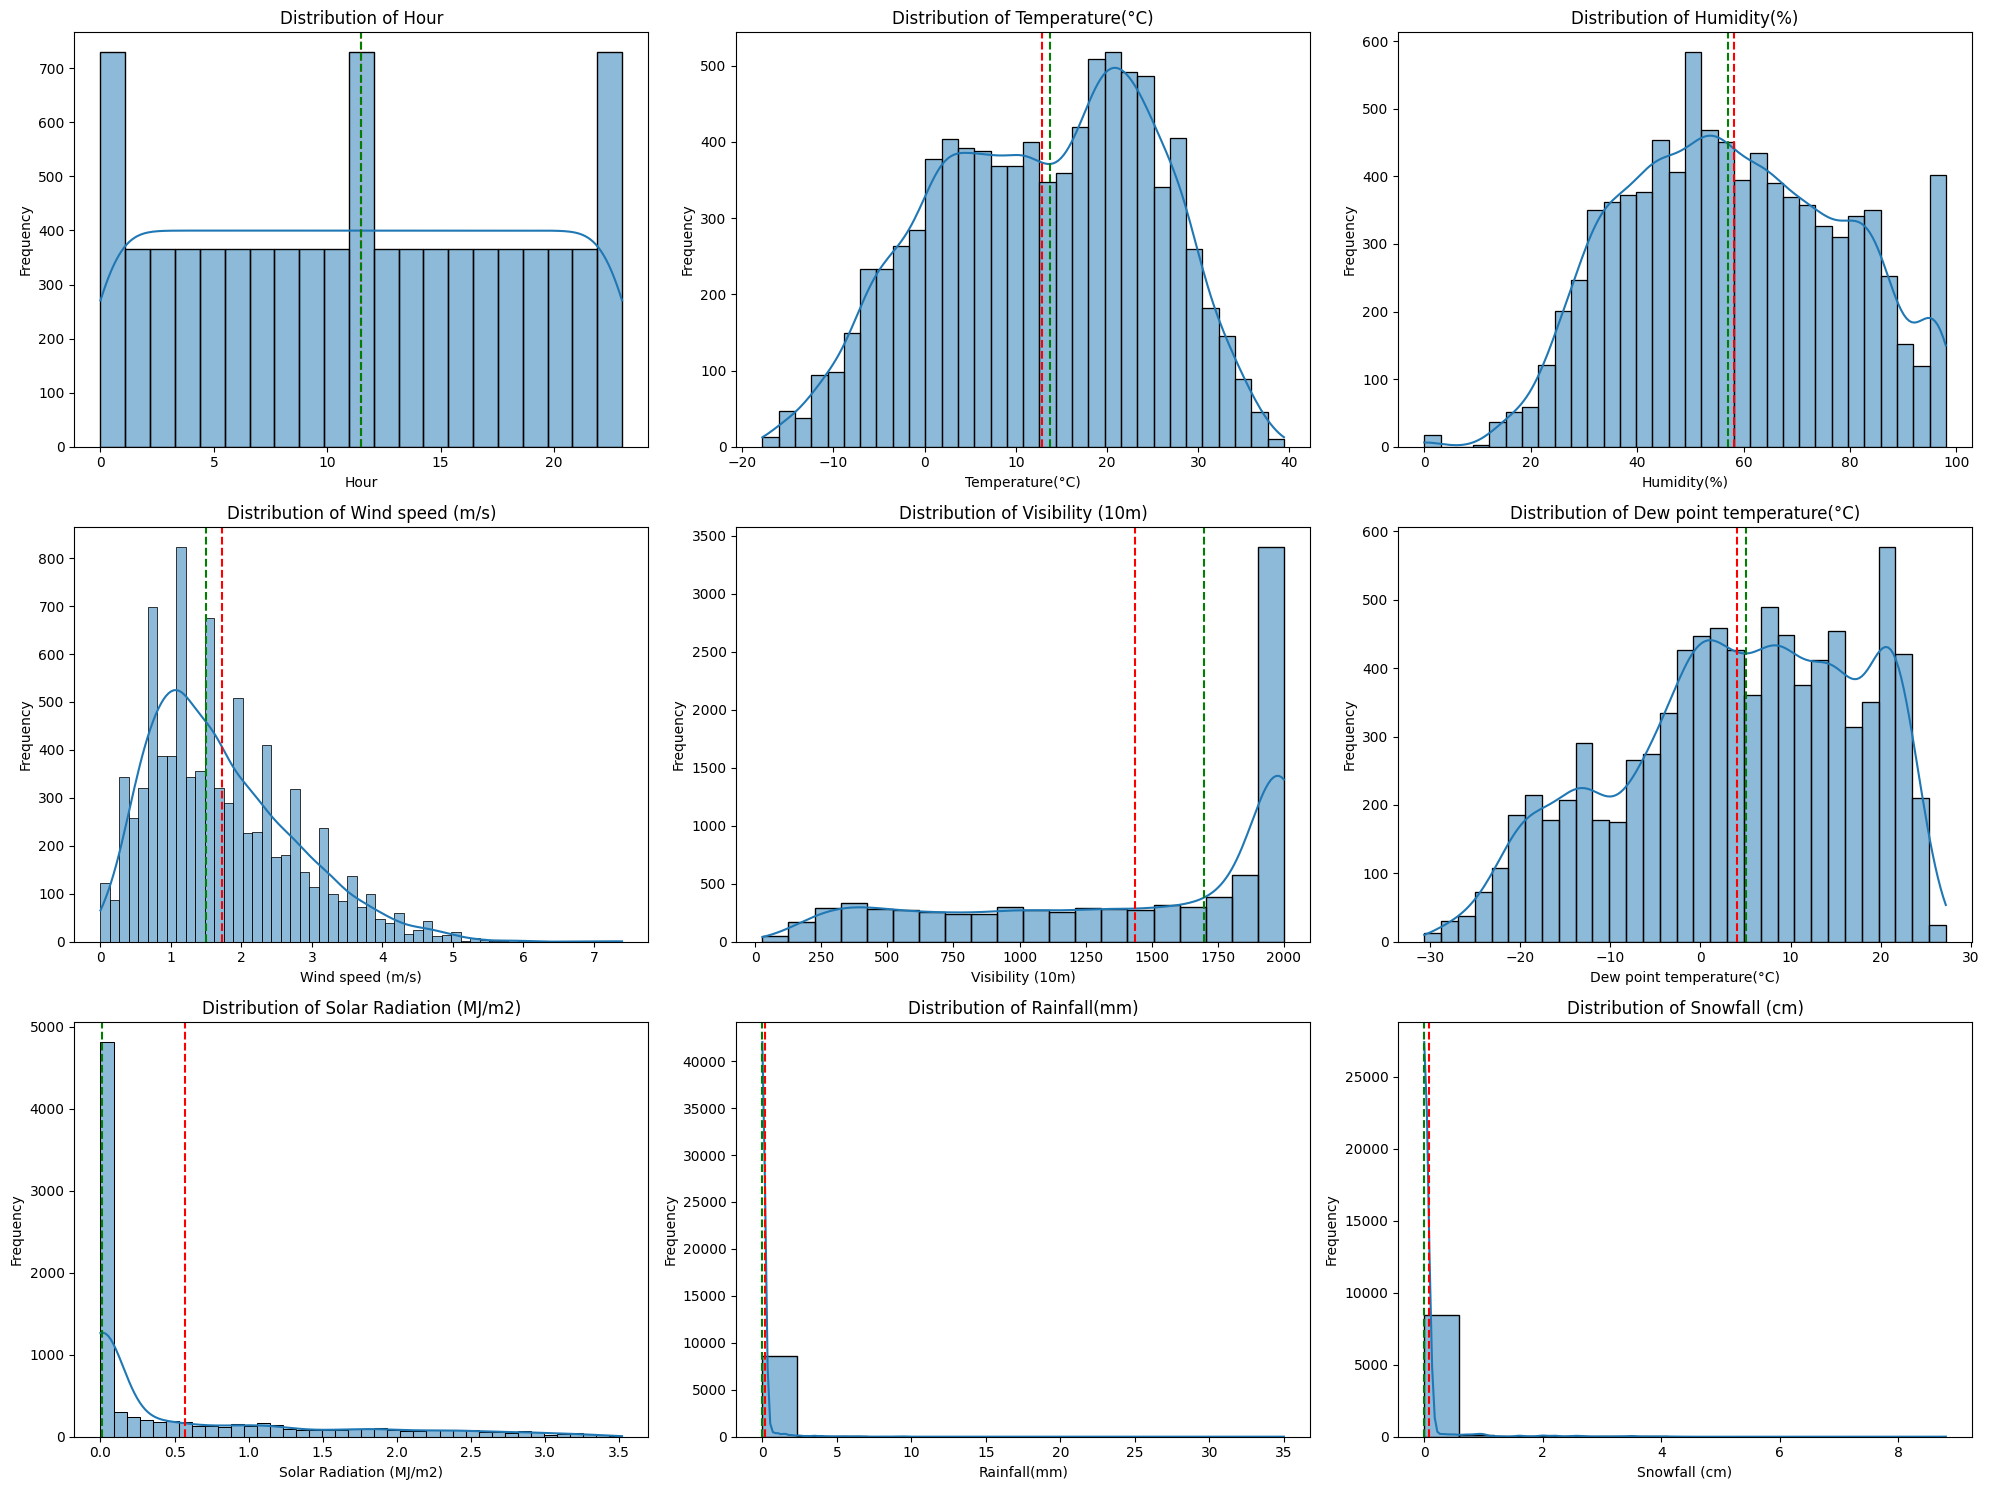

In [148]:
# Distribution of independent numerical features
plt.figure(figsize = (20,15))
for n , col in enumerate(independent_numerical_features):
  plt.subplot(3,3,n+1)
  sns.histplot(new_df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.axvline(new_df[col].mean() , color='red', linestyle='dashed', linewidth=1.5)
  plt.axvline(new_df[col].median() , color='green', linestyle='dashed', linewidth=1.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Histogram is useful for visualizing the distribution of numerical data.
Analysts can identify patterns or trends within the data, such as skewness or kurtosis, which can inform further analysis

##### 2. What is/are the insight(s) found from the chart?

we can see that temperature, humidity and dew point temperature is almost normally distributed. Other features such as Hour , visibility , wind speed, snowfall, rainfall and solar radiation needs to transform as they are not normally distributed.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analysts can identify patterns or trends within the data, such as skewness or kurtosis, which can inform further analysis

We can use this information to transform certain features so that we can train more robust and ccurate model wihch will help in demand prediction.

#### Chart - 10 : Visualizing outliers in the numerical independent variables

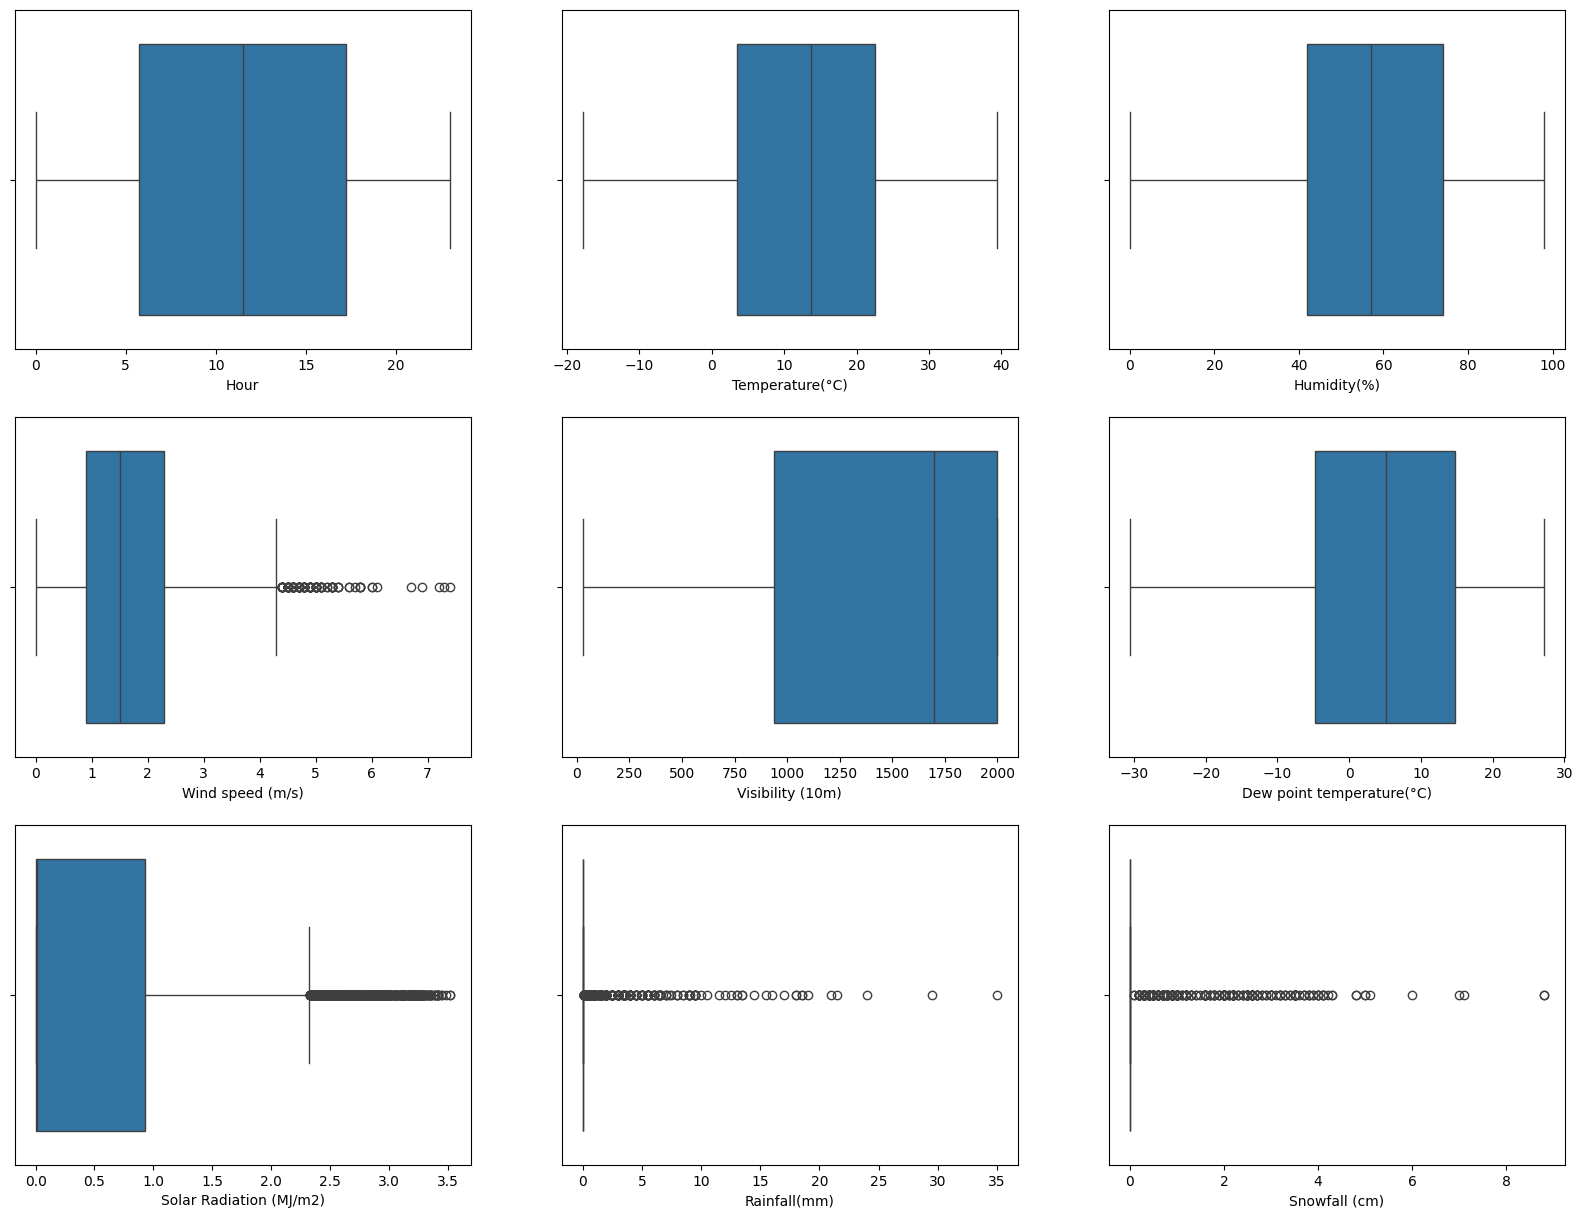

In [149]:
# box plot to analyze the outliers in the features
plt.figure(figsize = (20,15))
for n , col in enumerate(independent_numerical_features):
  plt.subplot(3,3,n+1)
  sns.boxplot(x= new_df[col])
plt.show()

##### 1. Why did you pick the specific chart?

I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value of different continuous features.

##### 2. What is/are the insight(s) found from the chart?

Some features such as wind speed, solar radiation , snowfall, raifall contains outliers



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Outliers can significantly affect statistical analyses and model performance by removing the outliers we can improve predictive accuaracy of our model.

#Bivariate analysis

#### Chart - 12 : regression plot of numerical features (Independent numerical to dependent variable)

In [150]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [151]:
independent_numerical_features

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [152]:
target_variable = 'Rented Bike Count'

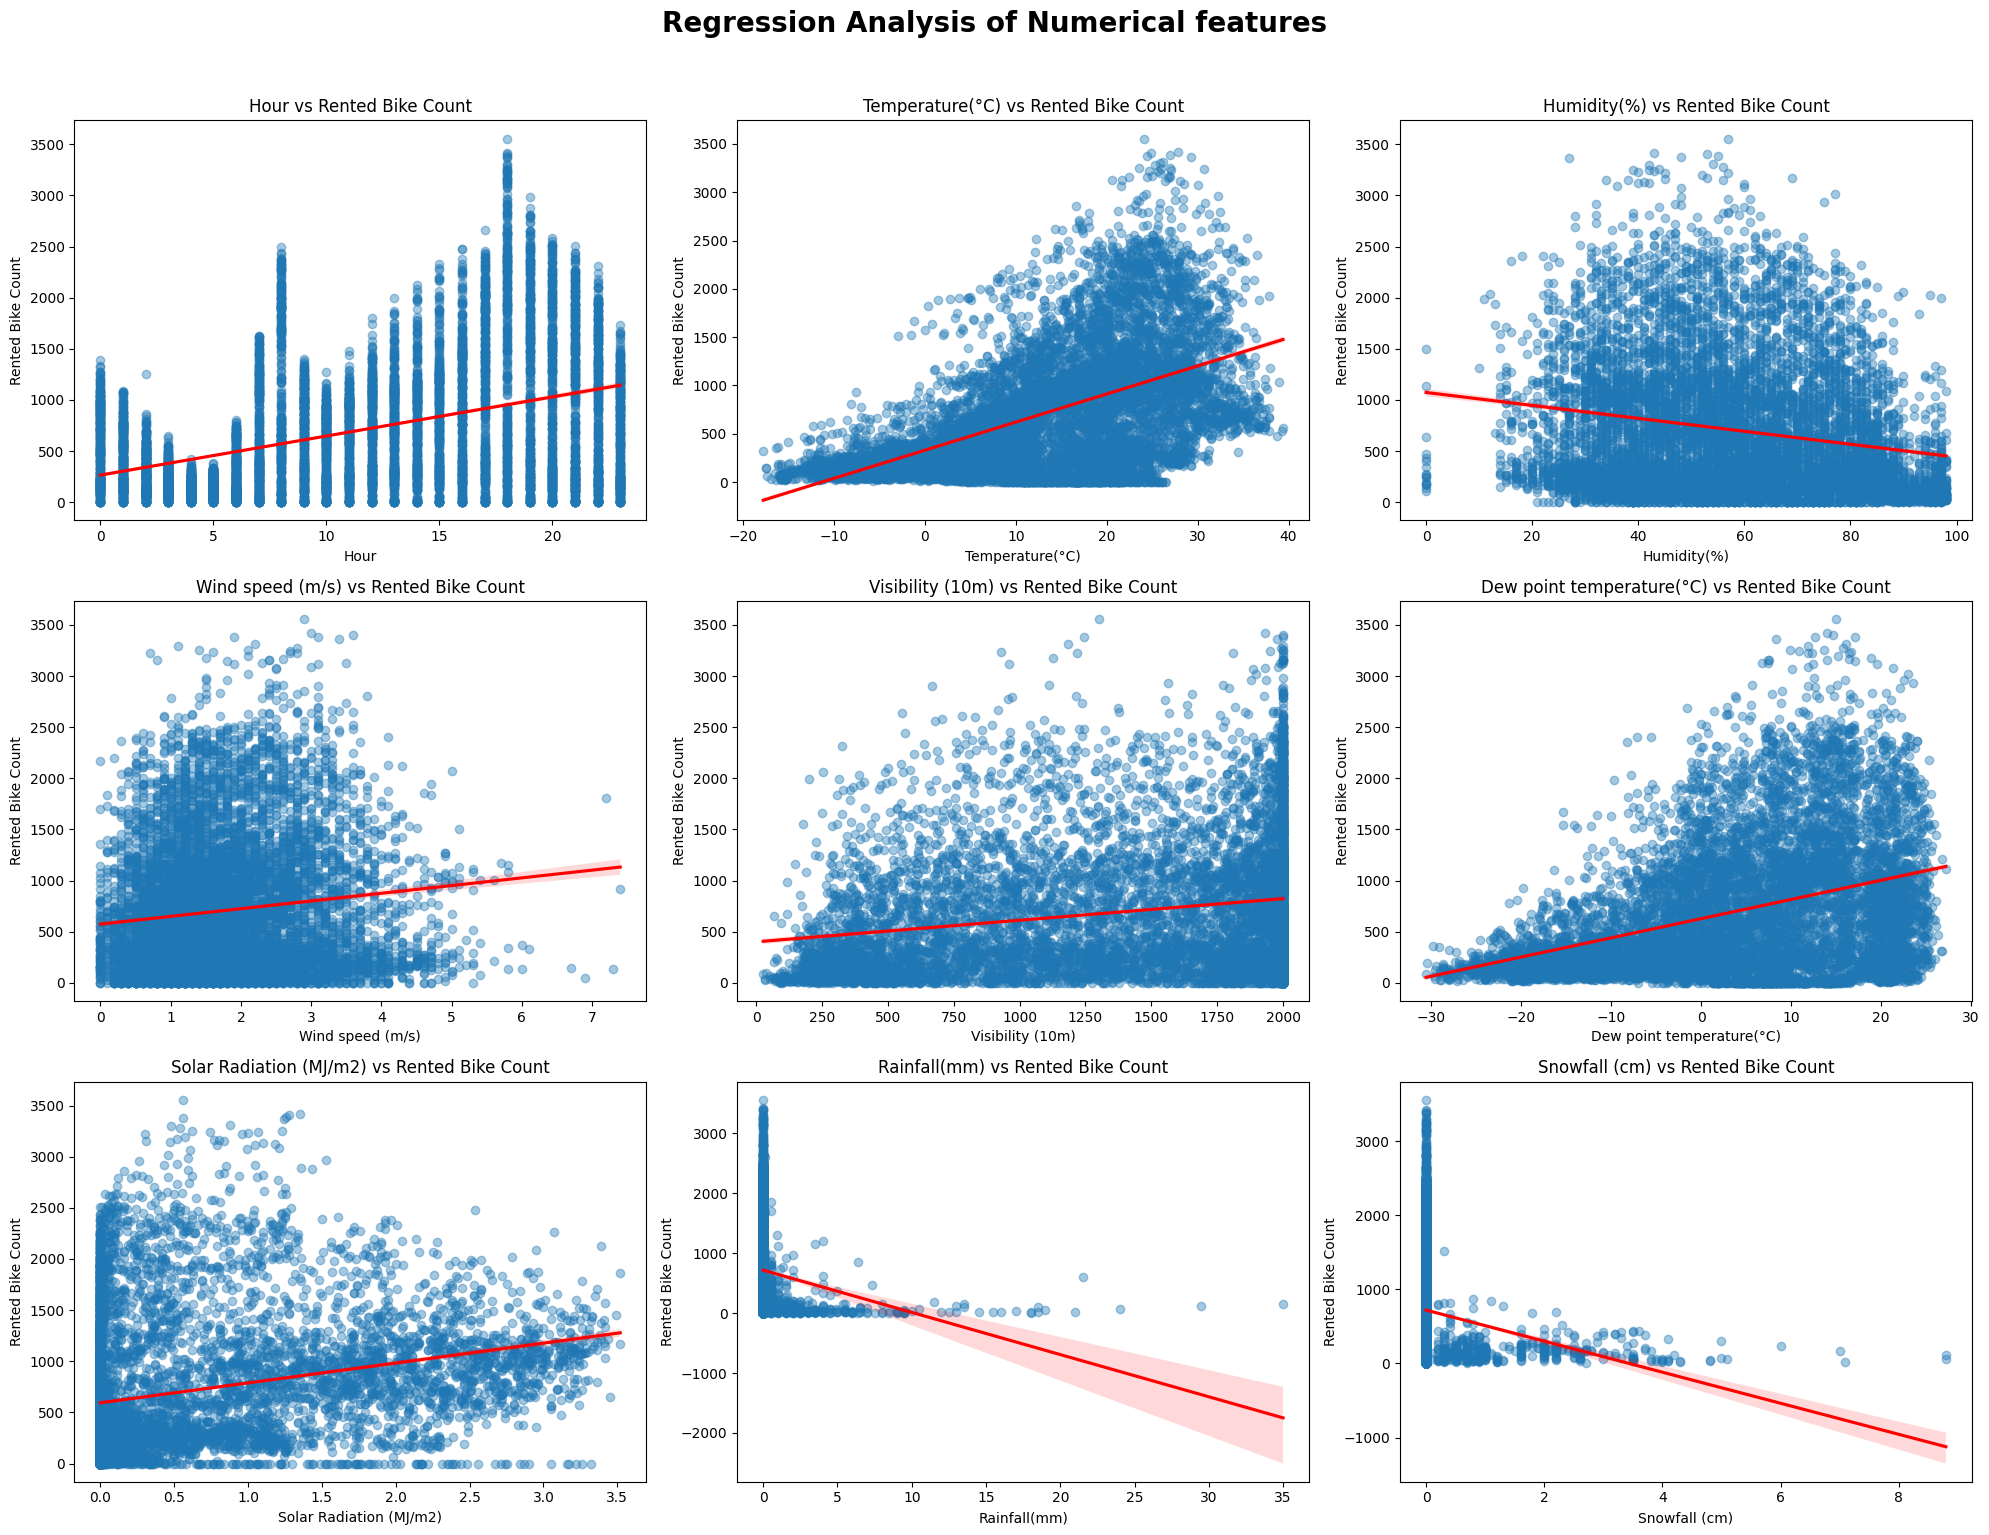

In [153]:
# regression plot of numerical features with target variable
plt.figure(figsize = (20,15))
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)
for n , col in enumerate(independent_numerical_features):
  plt.subplot(3,3,n+1)
  sns.regplot(x=new_df[col],y=new_df["Rented Bike Count"],scatter_kws={"alpha": 0.4} , line_kws={"color": "red"})
  plt.title(f'{col} vs {target_variable}')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Regression plots / scatter plot are both essential tools for visualizing relationships between variables, particularly in the context of linear regression analysis.

The main goal of a regression plot is to understand how changes in the independent variable affect the dependent variable. This is a key aspect of bivariate analysis, which focuses on examining the interactions between two variables

##### 2. What is/are the insight(s) found from the chart?

This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By fitting a regression line to data, businesses can predict future outcomes based on historical trends.


#### Chart - 13 : Box plot to detect outliers of target variable across categorical features

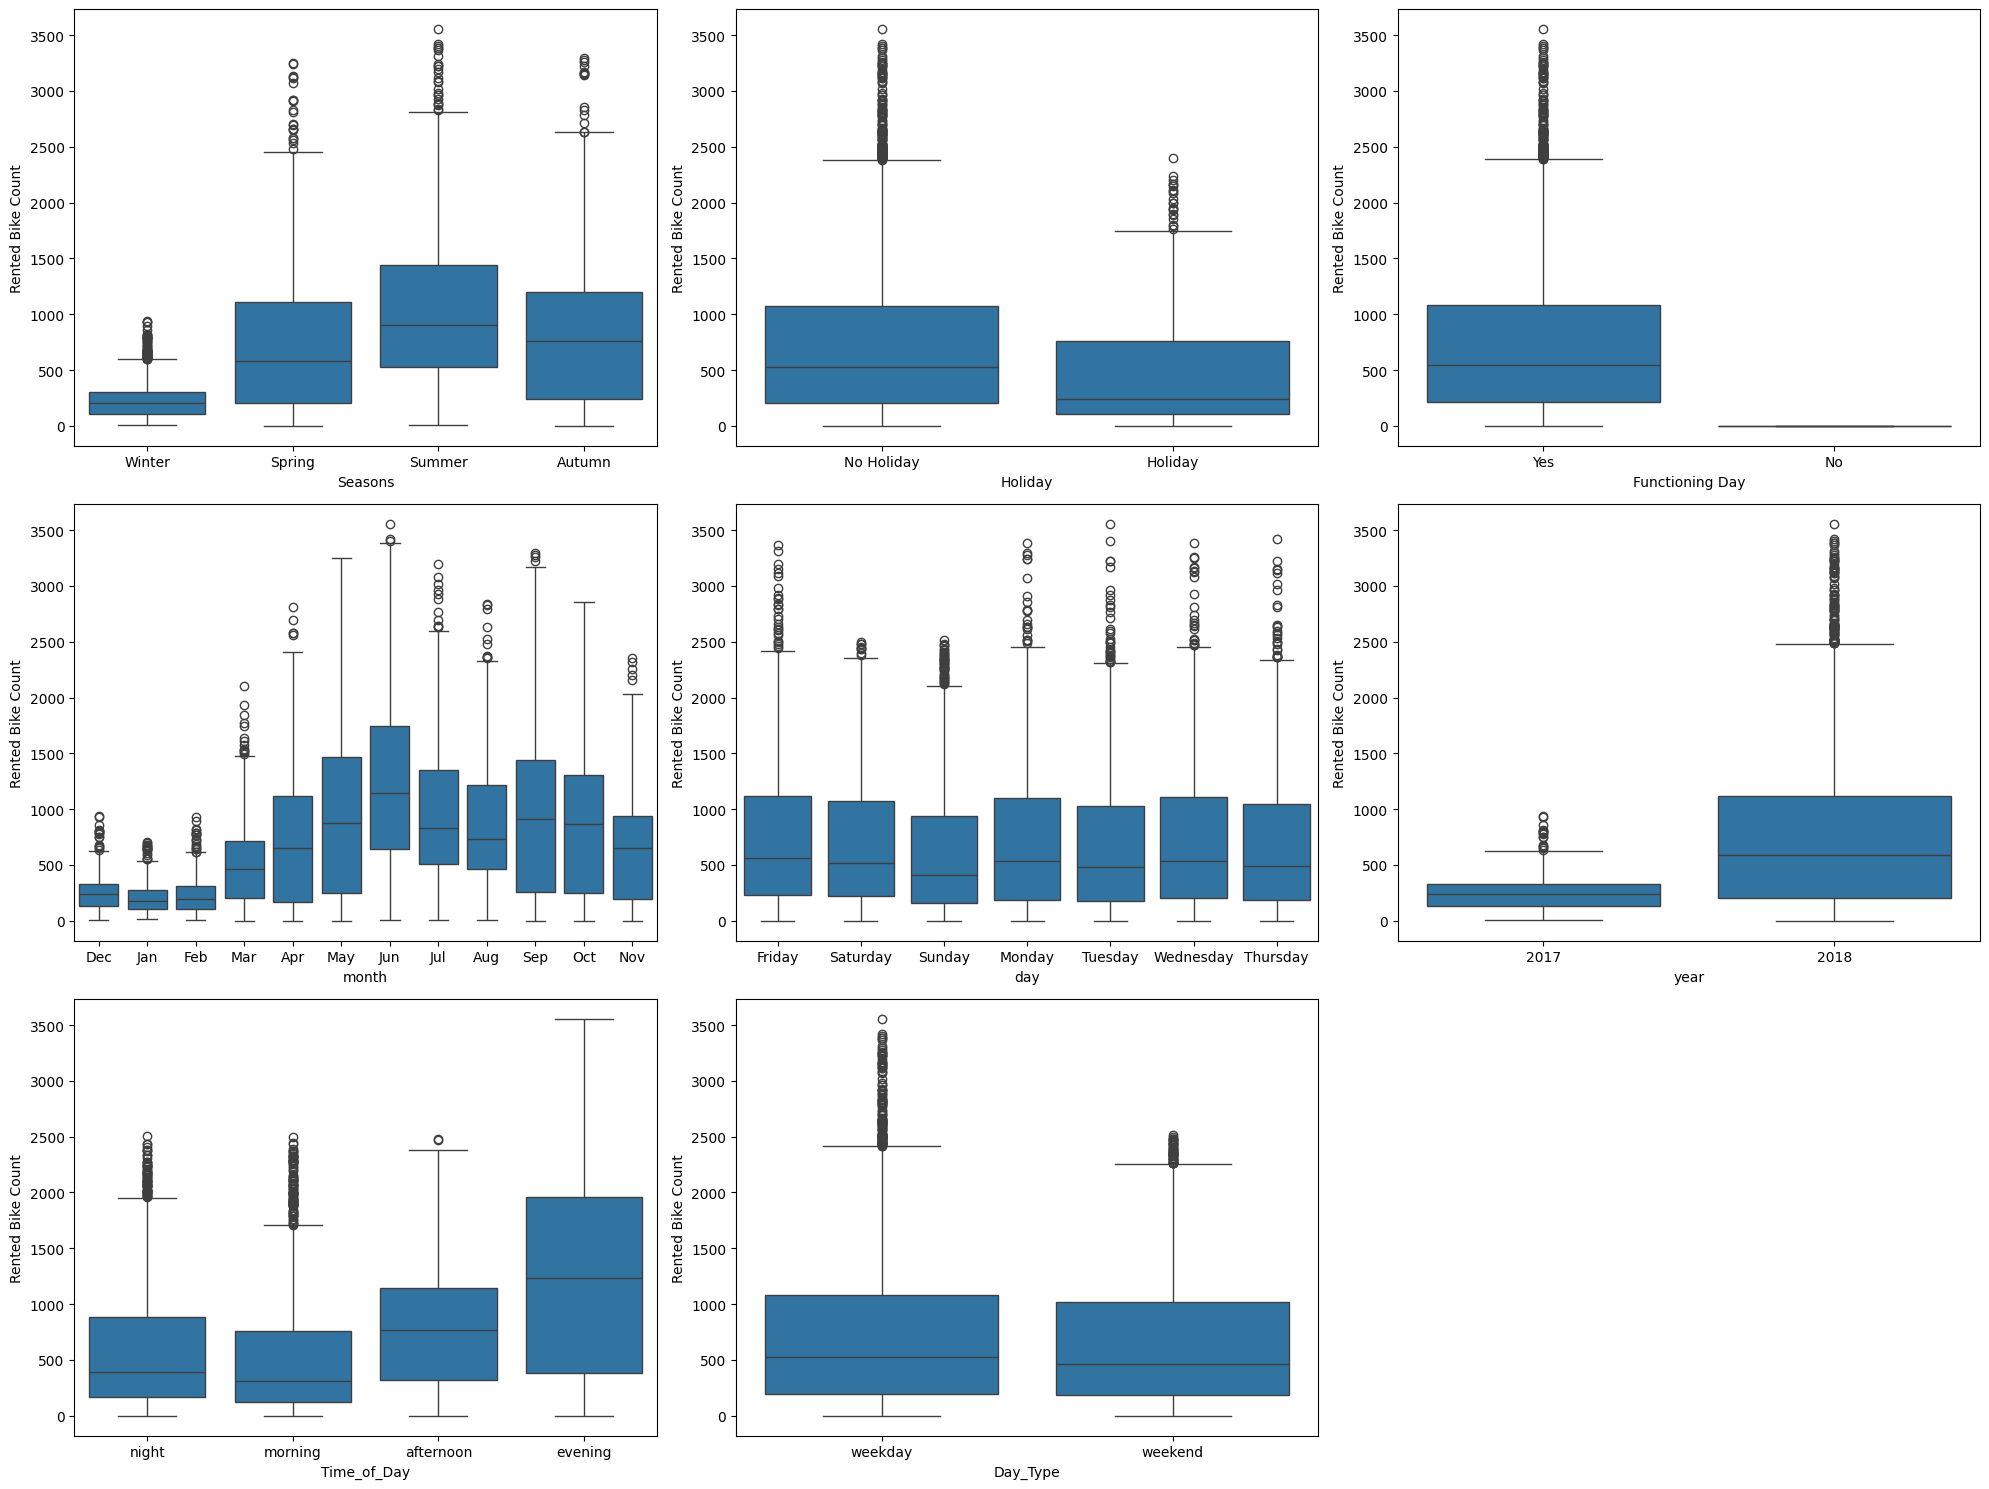

In [154]:
#ploting Box plot to visualize and trying to get information from plot
plt.figure(figsize=(20,15))
for n, col in enumerate(categorical_features):
  plt.subplot(3,3,n+1)
  sns.boxplot(x=new_df[col],y=new_df["Rented Bike Count"])
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Effective for comparing the dependent variable across different categories defined by an independent categorical variable.

##### 2. What is/are the insight(s) found from the chart?

We can see there are outliers in almost every subcategory of categorical features.

##Check correlation



In [155]:
# Correlation of independent numerical features with target variable
new_df.corr(numeric_only=True)['Rented Bike Count'] # Adding numeric_only=True to only include numerical features

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

It returns a Series where the index represents each feature in the DataFrame, and the values represent their correlation with "Rented Bike Count." This is useful for identifying which features have strong positive or negative relationships with the target variable.

#Multivariate Analysis

#### Chart - 14 - Correlation Heatmap

In [156]:
new_df[numerical_features].corr()

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

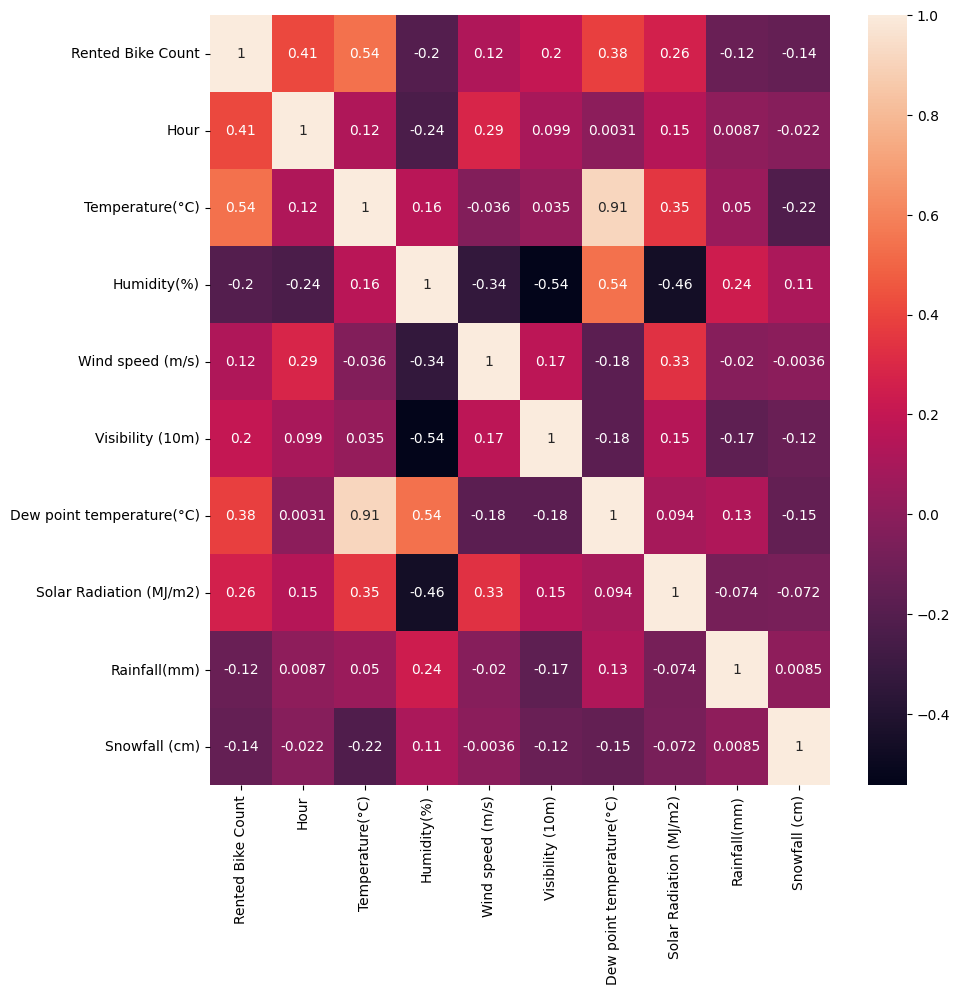

In [157]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,10))
sns.heatmap(new_df[numerical_features].corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is best suited to visualize correlation of numerical features. It helps to easily understand the correlation of numerical features based on color gradient.

##### 2. What is/are the insight(s) found from the chart?

1.Since dew_point_temperature and temperature have a correlation coefficient of 0.91
2.dew_point_temperature is less correlated to our target variable hence dropping dew_point_temperature.

3.Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

Example :

Since dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence dropping dew_point_temperature.

#### Chart - 15 - Pair Plot

<Figure size 2000x4000 with 0 Axes>

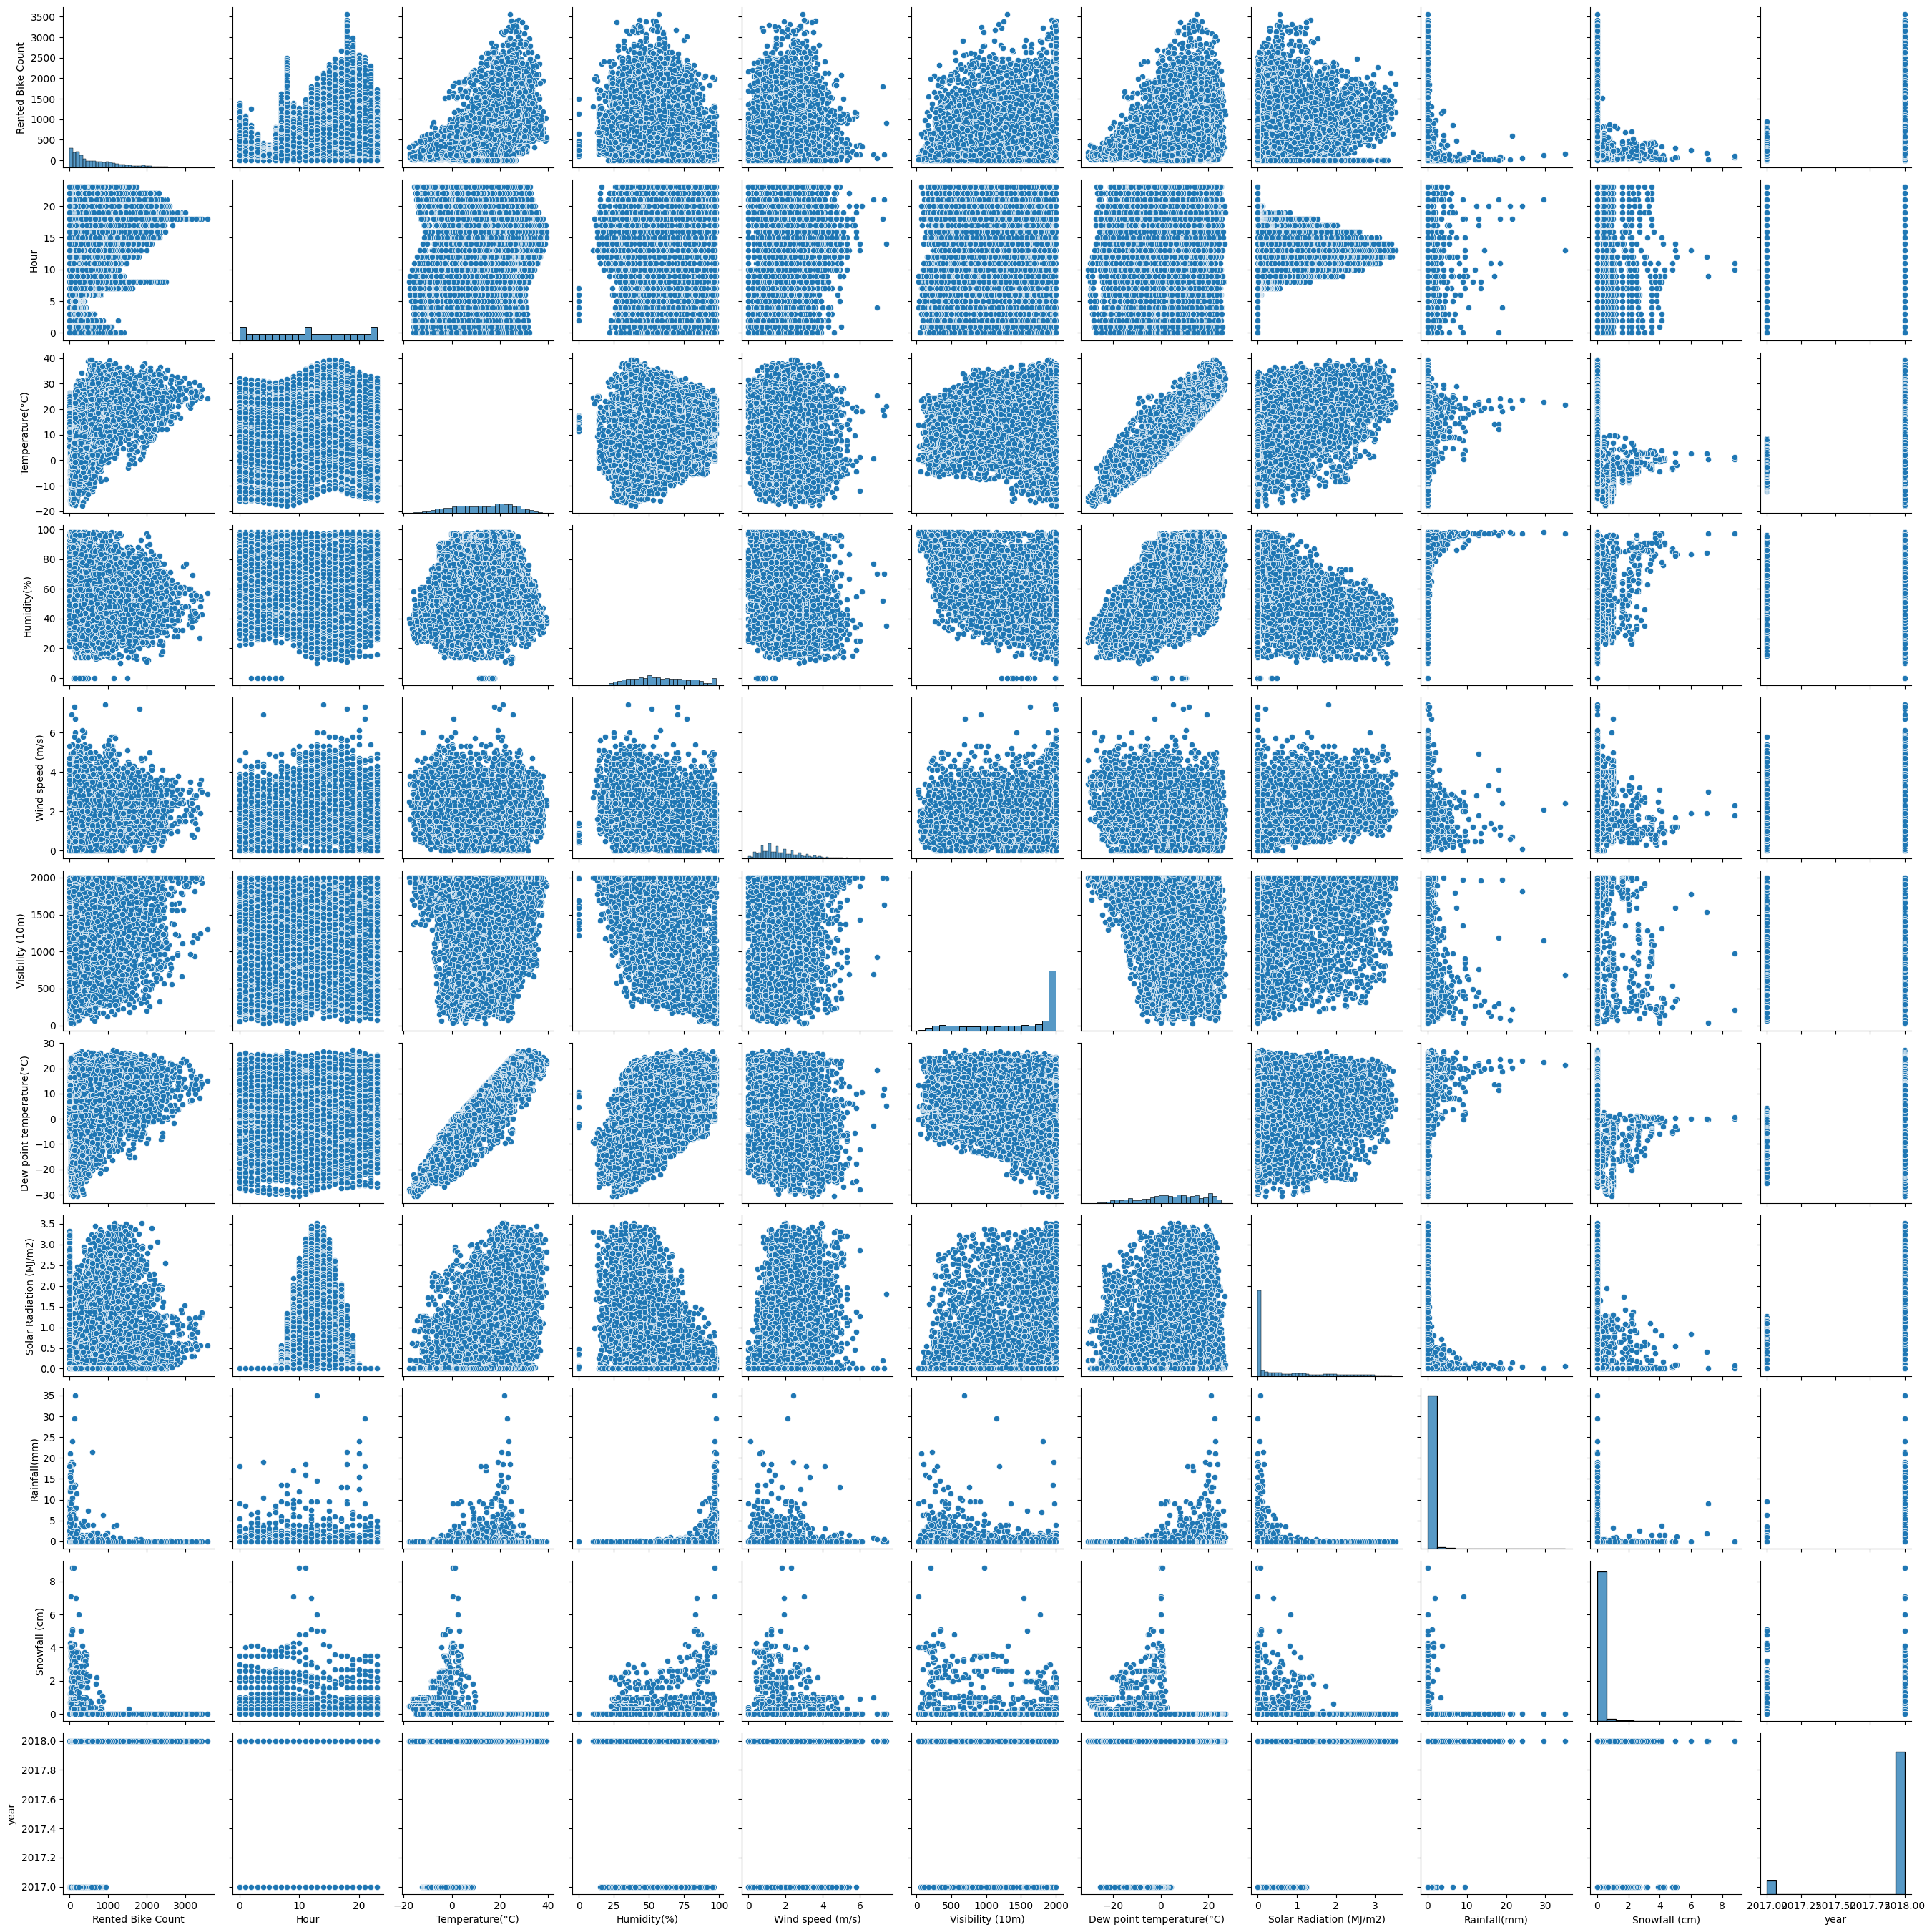

In [158]:
# Pair Plot visualization code
plt.figure(figsize=(20,40))
sns.pairplot(new_df)
plt.show()

##### 1. Why did you pick the specific chart?

it simultaneously visualizes multiple variables in a single figure. Each scatter plot in the pairplot represents a bivariate relationship (two variables), while the overall matrix of plots encompasses multiple variables, making it a multivariate analysis technique.

Pairplots allow you to see pairwise relationships between all combinations of variables in a dataset. This helps in identifying correlations, trends, and patterns among multiple features simultaneously.

##### 2. What is/are the insight(s) found from the chart?

We can see the Year column is not showing any relationship between variable and we can drop the year column.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Rented Bike Demand in hot weather is higher compared to demand in cold weather.

2.ented Bike Demand during rush hour (7-9AM & 5-7PM) and non-rush hour are different.

3.Average Rented Bike Demand is different in different seasons.

### Hypothetical Statement - 1

Rented Bike Demand in hot weather is higher compared to demand in cold weather.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(H₀) : There is no difference in rented bike demand between hot and cold weather. Mathematically, this can be expressed as:

μ
hot =
μ
cold

Alternative Hypothesis (H₁): Rented bike demand in hot weather is higher than in cold weather. This can be expressed as:

μ
hot >
μ
cold



#### 2. Perform an appropriate statistical test.

In [159]:
# Split the data into the 'hot' and 'cold' temperature groups
hot_temps = new_df[new_df['Temperature(°C)'] >= 20]['Rented Bike Count']
cold_temps = new_df[new_df['Temperature(°C)'] < 20]['Rented Bike Count']

In [160]:
# Sample sizes for different temperature groups
print("Hot Temp sample size:", hot_temps.shape[0])
print("Cold Temp sample size:", cold_temps.shape[0])

Hot Temp sample size: 2928
Cold Temp sample size: 5832


In [161]:
# Perform Statistical Test to obtain P-Value
mean_hot = hot_temps.mean()
mean_cold = cold_temps.mean()
std_hot = hot_temps.std(ddof=1) # Sample standard deviation
std_cold = cold_temps.std(ddof=1)
print("Mean Rented Bike Demand in Hot Weather:", mean_hot)
print("Mean Rented Bike Demand in Cold Weather:", mean_cold)
print("Standard Deviation of Rented Bike Demand in Hot Weather:", std_hot)
print("Standard Deviation of Rented Bike Demand in Cold Weather:", std_cold)
print("Cold temperature Bike Demand Variance: ", np.var(cold_temps))
print("Hot temperature Bike Demand Variance: ", np.var(hot_temps))

Mean Rented Bike Demand in Hot Weather: 1116.6103142076502
Mean Rented Bike Demand in Cold Weather: 497.75017146776406
Standard Deviation of Rented Bike Demand in Hot Weather: 710.8540214595747
Standard Deviation of Rented Bike Demand in Cold Weather: 493.1904137922089
Cold temperature Bike Demand Variance:  243195.07698899656
Hot temperature Bike Demand Variance:  505140.8600985332


In [208]:
# Perform the t-test
import scipy
t_stat, p_val1 = scipy.stats.ttest_ind(hot_temps, cold_temps, equal_var=False)
print(f't_stat : {t_stat}')
print(f'p_val1 : {p_val1}')

alpha = 0.05
if p_val1 < alpha:
    print("Reject the null hypothesis: Rented bike demand in hot weather is significantly higher than in cold weather.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rented bike demand between hot and cold weather.")


t_stat : 42.27606983032126
p_val1 : 0.0
Reject the null hypothesis: Rented bike demand in hot weather is significantly higher than in cold weather.


##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts is greater in hot temperatures than cold temperaures.

##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the hot and cold temperature groups.

### Hypothetical Statement - 2

Rented Bike Demand during rush hour (7-9AM & 5-7PM) is higher compared to non-rush hour.



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀)
The null hypothesis states that there is no difference in rented bike demand between rush hours and non-rush hours:

μ
rush =
μ
non rush


Alternative Hypothesis (H₁)
The alternative hypothesis states that rented bike demand during rush hours is higher than during non-rush hours:

μ
rush >
μ
non rush



#### 2. Perform an appropriate statistical test.

In [163]:
# Create subsets of the data based on hour
rush_hour = df[(df['Hour'] >= 7) & (df['Hour'] <= 9) | (df['Hour'] >= 17) & (df['Hour'] <= 19)]['Rented Bike Count']
non_rush_hour = df[~((df['Hour'] >= 7) & (df['Hour'] <= 9) | (df['Hour'] >= 17) & (df['Hour'] <= 19))]['Rented Bike Count']


In [164]:
# Sample sizes for different hours
print("Rush Hour sample size:", rush_hour.shape[0])
print("Non-Rush Hour sample size:", non_rush_hour.shape[0])

Rush Hour sample size: 2190
Non-Rush Hour sample size: 6570


In [165]:
print("Rush Hour Bike Demand Variance: ", np.var(rush_hour))
print("Non-Rush Hour Bike Demand Variance: ", np.var(non_rush_hour))
print("Rush Hour Bike Demand Mean: ", rush_hour.mean())
print("Non-Rush Hour Bike Demand Mean: ", non_rush_hour.mean())
print("Rush Hour Bike Demand Standard deviation: ", rush_hour.std(ddof=1))
print("Non-Rush Hour Bike Demand Standard deviation: ", non_rush_hour.std(ddof=1))

Rush Hour Bike Demand Variance:  651191.7549926001
Non-Rush Hour Bike Demand Variance:  294088.66494823125
Rush Hour Bike Demand Mean:  1017.37899543379
Non-Rush Hour Bike Demand Mean:  600.3430745814308
Rush Hour Bike Demand Standard deviation:  807.1488330309489
Non-Rush Hour Bike Demand Standard deviation:  542.3406992991448


In [209]:
# Perform Statistical Test to obtain P-Value
# Conduct a two-sample t-test to compare the mean bike rental demand during rush hour with the mean bike rental demand during non-rush hour times
t_stat, p_val2 = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

# Print the t-test results
print('t-statistic:', t_stat)
print('p-value:', p_val2)
alpha = 0.05
if p_val2 < alpha:
    print(f"Reject the null hypothesis: Rented bike demand in rush_hour is significantly higher than in non_rush_hour.")
else:
  print(f"Fail to reject the null hypothesis: No significant difference in rented bike demand between rush and non_rush weather.")


t-statistic: 22.542388723325413
p-value: 9.381784283723713e-104
Reject the null hypothesis: Rented bike demand in rush_hour is significantly higher than in non_rush_hour.


##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike count higher in rush hours than non-rush hours.

##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the rush hours and non-rush hours.

### Hypothetical Statement - 3

Rented Bike Demand is different in different seasons with highest in summer and lowest in winter.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀) : The null hypothesis states that there is no difference in rented bike demand among the seasons:

μ
summer =
μ
spring =
μ
fall =
μ
winter

Alternative Hypothesis (H₁) :
The alternative hypothesis states that rented bike demand is different across seasons, specifically that summer has the highest demand and winter has the lowest:

μ
summer >
μ
spring >
μ
fall >
μ
winter




#### 2. Perform an appropriate statistical test.

In [217]:
# Sample sizes for different seasons
total_seasonal_demand = new_df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending = False)
print(total_seasonal_demand)

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64


In [202]:
Average_seasonal_demand = new_df.groupby('Seasons')['Rented Bike Count'].mean()
print(Average_seasonal_demand)

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64


In [213]:
# Conduct the ANOVA test
f_stat, p_val3 = scipy.stats.f_oneway(new_df.loc[df['Seasons']=='Spring', 'Rented Bike Count'],
                                  new_df.loc[df['Seasons']=='Summer', 'Rented Bike Count'],
                                  new_df.loc[df['Seasons']=='Autumn', 'Rented Bike Count'],
                                  new_df.loc[df['Seasons']=='Winter', 'Rented Bike Count'])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_val3)
print()

# Conclusion based on p-value
alpha = 0.05
if p_val3 < alpha:
    print("Reject the null hypothesis: There are significant differences in rented bike demand across different seasons.")
else:
    print("Fail to reject the null hypothesis: No significant differences in rented bike demand across seasons.")

F-statistic: 776.4678149879506
p-value: 0.0

Reject the null hypothesis: There are significant differences in rented bike demand across different seasons.


##### Which statistical test have you done to obtain P-Value?

I have used One-way ANOVA test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts are significantly different in different seasons.

##### Why did you choose the specific statistical test?

To determine if there are significant differences in bike rental demand between the seasons, we can use ANOVA (Analysis of Variance), which is appropriate for comparing means across multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [168]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [169]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [170]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [171]:
# Expand Contraction

#### 2. Lower Casing

In [172]:
# Lower Casing

#### 3. Removing Punctuations

In [173]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [174]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [175]:
# Remove Stopwords

In [176]:
# Remove White spaces

#### 6. Rephrase Text

In [177]:
# Rephrase Text

#### 7. Tokenization

In [178]:
# Tokenization

#### 8. Text Normalization

In [179]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [180]:
# POS Taging

#### 10. Text Vectorization

In [181]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [182]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [183]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [184]:
# Transform Your data

### 6. Data Scaling

In [185]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [186]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [187]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [188]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [189]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [190]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [191]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [192]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [193]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [194]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [195]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [196]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [197]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [198]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***